In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
df = pd.read_csv('../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df.iloc[:, 3:].values

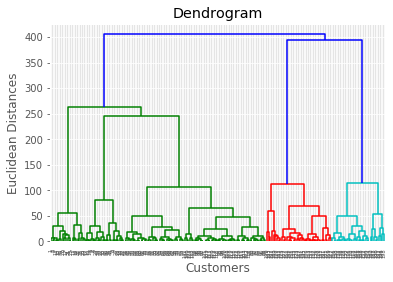

In [13]:
# using dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [20]:
# from the output, we can determine the optimal number of clusters to be 5

# fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5

hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

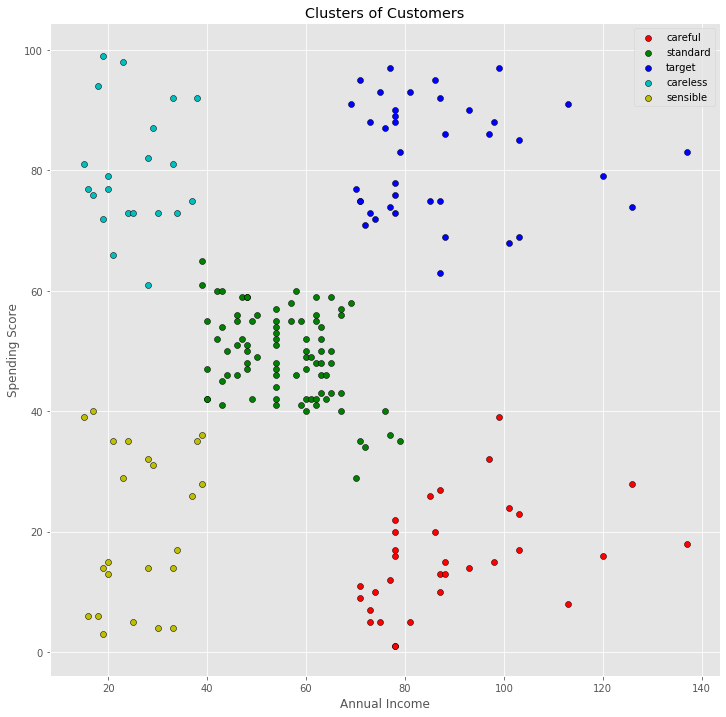

In [29]:
# Visualizing the clusters
colors = ['r', 'g', 'b', 'c', 'y']
labels = ['careful', 'standard', 'target', 'careless', 'sensible']

plt.figure(figsize=(12,12))
for i in range(n_clusters):
    cluster_vectors = [X[j] for j in range(len(X)) if y_hc[j] == i]
    plt.scatter([x[0] for x in cluster_vectors], 
                [x[1] for x in cluster_vectors], 
                label=labels[i],
                edgecolors='black',
                color=colors[i])

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()